Pada tugas kali ini, kita akan mencoba untuk membuat model dari data training untuk mengklasifikasikan data_uji.

Kita ingin melihat dengan fitur yang dimiliki apakah penumpang tersebut akan selamat atau tidak.

Algoritma yang akan kita gunakan adalah logistic regression.


In [ ]:
#import semua package/library pada sel ini, jika butuh memasukkan package/library baru maka run ulang sel ini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
import sklearn.feature_selection as fs
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

2. Data Collection


In [ ]:
#panggil data kalian dan masukkan pada dua variabel data_mentah untuk train dan data_uji untuk data_uji
data_mentah = pd.read_csv("./train.csv")
data_uji = pd.read_csv("./data_uji.csv")

In [ ]:
#tampilkan head dari data_mentah
data_mentah.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0


Expected Output

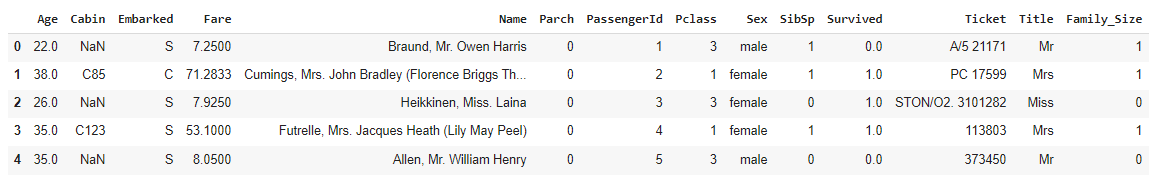

In [ ]:
#tampilkan head dari data_uji
data_uji.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911,Mr,0
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272,Mrs,1
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276,Mr,0
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154,Mr,0
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298,Mrs,2


Expected Output

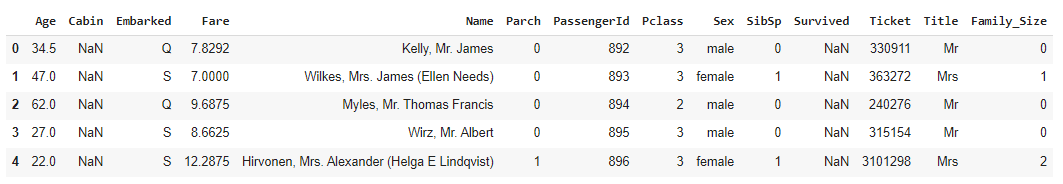

3. Data Preparation

Pada bagian ini kita akan memperbaiki nan value

In [ ]:
def countIsNaAndDescribe(df):
  display(df.isna().sum())
  display(df.describe())

In [ ]:
#Check detail dan nilai NaN pada data_mentah. gunakan print untuk Nilai NaN
countIsNaAndDescribe(data_mentah)

Age              0
Cabin          687
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         0
Ticket           0
Title            0
Family_Size      0
dtype: int64

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Family_Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.445196,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838,0.904602
std,13.244896,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592,1.613459
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000,0.000000
50%,30.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000,0.000000
75%,35.500000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000,10.000000


Expected Output

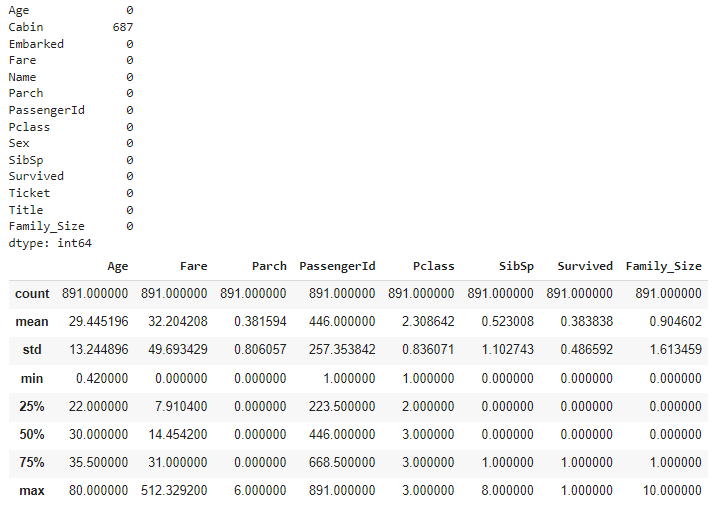

In [ ]:
#Check detail dan nilai NaN pada data_uji. gunakan print untuk Nilai NaN
countIsNaAndDescribe(data_uji)

Age             0
Cabin          10
Embarked        0
Fare            0
Name            0
Parch           0
PassengerId     0
Pclass          0
Sex             0
SibSp           0
Survived       10
Ticket          0
Title           0
Family_Size     0
dtype: int64

,Age,Cabin,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Family_Size
count,10.000000,0.0,10.000000,10.000000,10.00000,10.000000,10.000000,0.0,10.000000
mean,30.150000,NaN,12.270010,0.200000,896.50000,2.800000,0.500000,NaN,0.700000
std,14.541225,NaN,7.777627,0.421637,3.02765,0.421637,0.707107,NaN,0.948683
min,14.000000,NaN,7.000000,0.000000,892.00000,2.000000,0.000000,NaN,0.000000
25%,21.250000,NaN,7.679200,0.000000,894.25000,3.000000,0.000000,NaN,0.000000
50%,26.500000,NaN,8.943750,0.000000,896.50000,3.000000,0.000000,NaN,0.000000
75%,33.375000,NaN,11.637500,0.000000,898.75000,3.000000,1.000000,NaN,1.750000
max,62.000000,NaN,29.000000,1.000000,901.00000,3.000000,2.000000,NaN,2.000000


Expected Output

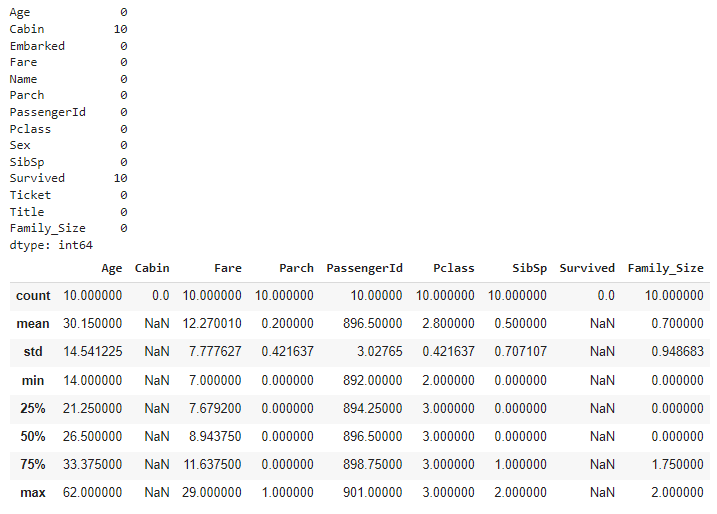

Terlihat untuk data cabin memiliki banyak nilai NaN. Jadi akan kita drop data tersebut. Name, Ticket, Title juga akan kita drop karena memiliki banyak nilai unik dan berbentuk string.

In [ ]:
#drop kolom yang tidak dibutuhkan dari kedua dataframe
dropped_columns = ["Cabin", "Name", "Ticket", "Title"]

data_mentah.drop(dropped_columns, axis=1, inplace=True, errors="ignore")
data_uji.drop(dropped_columns, axis=1, inplace=True, errors="ignore" )

In [ ]:
#tampilkan head mentah
data_mentah.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family_Size
0,22.0,S,7.2500,0,1,3,male,1,0.0,1
1,38.0,C,71.2833,0,2,1,female,1,1.0,1
2,26.0,S,7.9250,0,3,3,female,0,1.0,0
3,35.0,S,53.1000,0,4,1,female,1,1.0,1
4,35.0,S,8.0500,0,5,3,male,0,0.0,0


Expected Output

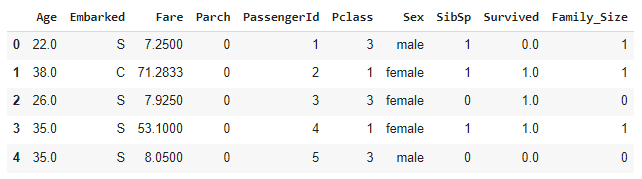


In [ ]:
#tampilkan head uji
data_uji.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family_Size
0,34.5,Q,7.8292,0,892,3,male,0,NaN,0
1,47.0,S,7.0000,0,893,3,female,1,NaN,1
2,62.0,Q,9.6875,0,894,2,male,0,NaN,0
3,27.0,S,8.6625,0,895,3,male,0,NaN,0
4,22.0,S,12.2875,1,896,3,female,1,NaN,2


Expected Output

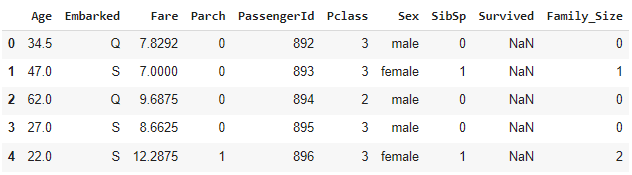

In [ ]:
#sekarang kita akan mengubah male : 0 dan female menjadi 1 pada kolom Sex. S = 1, C = 2, Q = 3 pada kolom embarked. Ubah kedua dataframe. 
#tampilkan head pada data mentah
#manfaatkan modul replace

def replaceSexAndEmbarkedValue(df, log=False):
  newDf = df.copy()
  if (newDf.Sex.dtypes== object):
    newDf.Sex = newDf.Sex.replace({"male":0, "female": 1})
  if (newDf.Embarked.dtypes== object):
    newDf.Embarked = newDf.Embarked.replace({"S":1, "C": 2, "Q": 3})
  if (log):
    print("\nbefore")
    display(df.head())
    print("\nafter")
    display(newDf.head())
  return newDf

data_mentah = replaceSexAndEmbarkedValue(
    data_mentah
    # , log=True
)
data_uji = replaceSexAndEmbarkedValue(
    data_uji
    # , log=True
)

display(data_mentah.head())

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family_Size
0,22.0,1,7.2500,0,1,3,0,1,0.0,1
1,38.0,2,71.2833,0,2,1,1,1,1.0,1
2,26.0,1,7.9250,0,3,3,1,0,1.0,0
3,35.0,1,53.1000,0,4,1,1,1,1.0,1
4,35.0,1,8.0500,0,5,3,0,0,0.0,0


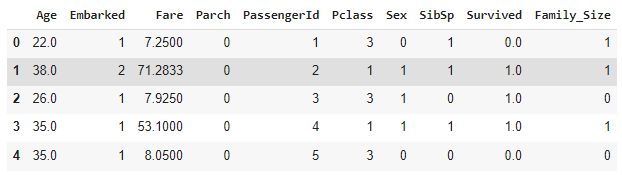

Sekarang kita akan membagi data_mentah menjadi data training dan test


In [ ]:
#pilih data yang akan menjadi fitur dan label. gunakan data_mentah karena kita akan membuat model
feature_columns = ["Age", "Embarked", "Fare", "Parch", "PassengerId", "Pclass", "Sex", "SibSp", "Family_Size"] 
X = data_mentah[feature_columns]
y = data_mentah[["Survived"]]
display(X.head())
display(y.head())

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Family_Size
0,22.0,1,7.2500,0,1,3,0,1,1
1,38.0,2,71.2833,0,2,1,1,1,1
2,26.0,1,7.9250,0,3,3,1,0,0
3,35.0,1,53.1000,0,4,1,1,1,1
4,35.0,1,8.0500,0,5,3,0,0,0


,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [ ]:
#import sklearn.feature_selection pada sel package/library aliaskan sebagai fs
#import module LogisticRegression dari sklearn.linear_model. taruh pada sel package/library

model_lr = LogisticRegression()
rfe = fs.RFE(model_lr)
rfe.fit(X,y)
print(f'Support = {rfe.support_}')
print(f'Ranking = {rfe.ranking_}')

Support = [False  True False False False  True  True  True False]
Ranking = [3 1 4 6 5 1 1 1 2]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

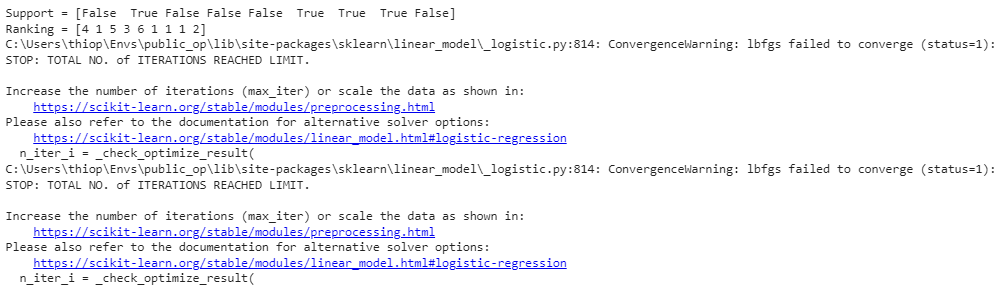

In [ ]:
#sekarang kita ubah nilai X dengan mengikuti nilai kolom terbaik. urutan pada list ranking sesuai urutan pada saat inisiasi variabel X
# pilih ranking 1

firstRankIdx = np.where(rfe.ranking_==1)[0]
bestFeature = []
for idx in firstRankIdx:
  bestFeature.append(feature_columns[idx])

X = data_mentah[bestFeature]
X.columns

Index(['Embarked', 'Pclass', 'Sex', 'SibSp'], dtype='object')

In [ ]:
'''import/tambahkan semua package/library pada sel paling atas(terkait library)
masukkan kedua kolom tersebut pada variabel yang bersesuaian.
kita bagi menjadi data training dan test dengan test_size = 0.2
'''
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    random_state = 123  
)

print(f'dimensi dari X_train : {len(X_train)}')
print(f'dimensi dari y_train : {len(y_train)}')
print(f'dimensi dari X_test : {len(X_test)}')
print(f'dimensi dari y_test : {len(y_test)}')

dimensi dari X_train : 712
dimensi dari y_train : 712
dimensi dari X_test : 179
dimensi dari y_test : 179


Expected Output

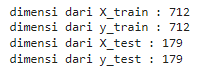

4. Data Processing

In [ ]:
#training model
#langsung gunakan object logistic regression yang sudah dibuat sebelumnya

model = LogisticRegression()
# fit the model with data
model.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Expected Output

image.png

In [ ]:
#Evaluasi
#kita buat variabel y_predict
#import modul metrics dari sklearn. Taruh pada sel package/library di awal
#test nilai AUC

y_pred = model.predict(X_test)
auc = metrics.accuracy_score(y_test, y_pred)
print(f'Nilai AUC : {auc}')

Nilai AUC : 0.8156424581005587


Expected Output

image.png

Sekarang kita akan mencoba mengklasifikasikan data_uji kita

In [ ]:
#buat sebuah variabel untuk menampung kolom dari data_uji. Ingat kolom yang dipilih harus sama dengan semua kolom pada saat memilih X
#lakukan prediksi dengan menggunakan variabel pada poin satu.
#masukkan variabel pada poin dua pada data uji kolom Survived
#tampilkan data_uji

data_uji_for_pred = data_uji[bestFeature]
data_uji["Survived"] = model.predict(data_uji_for_pred)

data_uji

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family_Size
0,34.5,3,7.8292,0,892,3,0,0,0.0,0
1,47.0,1,7.0000,0,893,3,1,1,1.0,1
2,62.0,3,9.6875,0,894,2,0,0,0.0,0
3,27.0,1,8.6625,0,895,3,0,0,0.0,0
4,22.0,1,12.2875,1,896,3,1,1,1.0,2
5,14.0,1,9.2250,0,897,3,0,0,0.0,0
6,30.0,3,7.6292,0,898,3,1,0,1.0,0
7,26.0,1,29.0000,1,899,2,0,1,0.0,2
8,18.0,2,7.2292,0,900,3,1,0,1.0,0
9,21.0,1,24.1500,0,901,3,0,2,0.0,2


Expected Output

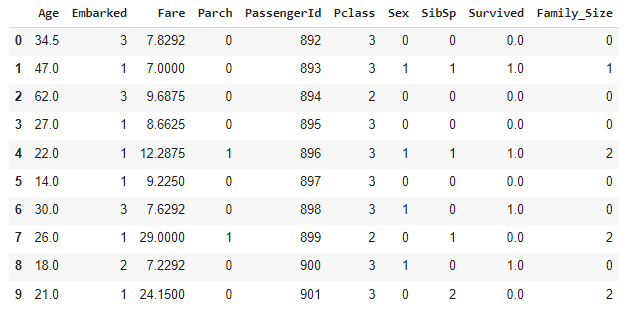

In [ ]:
#tuliskan hasil analisa kalian disini


**Pemilihan Logistic Regression**
- Logistic regression adalah salah satu bentuk regresi yang dilakukan untuk mengklasifikasikan data ke dalam dua group. 
- Dengan demikian penggunakan regresi ini cocok untuk diterapkan untuk mengelompokkan data set penumpang titanic menjadi dua kelompok, yakni penumpang yang selamat atau tidak. 


**Pemilihan Feature**
- Untuk mendapatkan hasil yang baik, sebelum dilakukan pengolahan dengan menggunakan regresi ini, perlu dilakukan pemilihan feature. 
- Pemilihan feature dilakukan dengan menggunakan metode Recursive feature elimination (RFE) yang terdapat dalam modul sklearn.
- Dengan metode tersebut diperoleh beberapa fitur yang dianggap memiliki pengaruh terhadap selamat atau tidaknya penumpang.
- Fitur tersebut antara lain sebagai berikut : 
  - Age (Usia)
  - Embarked (Keberangkatan Pelabuhan)
  - Fare (Tarif Penumpang)
  - Parch (Jumlah orang tua /anak yang berangkat)
  - PassengerId
  - Pclass (Kelas Penumpang) 
  - Sex (Jenis Kelamin)
  - Family Size (Jumlah keluarga)
  - Sibsp (Jumlah saudara / pasangan)

- Note : Deskripsi feature diperoleh dari http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf




**Analisis Feature**
- Pemilihan feature bisa menunjukkan fitur mana yang berpengaruh, namun tidak menunjukkan arah korelasi tiap feature terhadap selamat atau tidaknya penumpang. Meski begitu ada beberapa dugaan (yang perlu diuji), terkait dengan korelasi feature ini. 

- **Jenis Kelamin** : Jika diperhatikan pada hasil prediksi di atas, penumpang dengan jenis kelamin perempuan cenderung dikelompokkan kepada penumpang yang selamat. Coba lihat grafik jumlah penumpang yang selamat/tidak pada data mentah sebagai berikut.

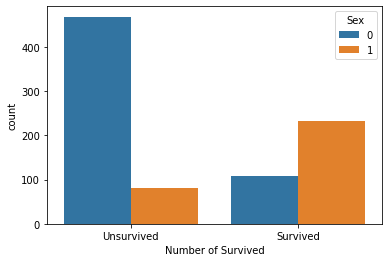

In [ ]:
def plotSurvivedBy(data, category):
  sns.countplot(data=data, x="Survived", hue=category)
  plt.xticks([0, 1], ['Unsurvived', 'Survived'])
  plt.xlabel("Number of Survived")
  plt.show()

plotSurvivedBy(data_mentah, "Sex")

- Berikutnya mengenai jumlah keluarga (**family size**), anak atau orang tua (**parch**) dan jumlah saudara/pasangan (**sibsp**). Saya mengelompokkan ini karena sepertinya memiliki karakteristik yang sama. Berdasarkan pengamatan data di atas, penumpang yang sendirian (tidak bersama keluarga, anak/orang tua, atau saudara) cenderung tidak selamat pada insiden ini. Agak masuk akal sebetulnya, bisa jadi dengan membawa keluarga, pada saat kecelakaan mereka saling membantu sehingga bisa selamat dari insiden itu. Tentu saja hal ini perlu dilakukan klasifikasi apakah betul dugaan ini. 
- **Pclass**: Kelas penumpang terdiri atas 3 kelas yakni  1: upper, 2: middle, dan 3:lower. Secara logika penumpang dengan, penumpang dengan kelas upper atau middle lebih cenderung selamat dibandingkan penumpang kelas 3. Hal ini karena kemudahan akses ke kapal kecil dsb. Mari kita plot jumlah penumpang yang selamat yang telah dikelompokkan berdasarkan kelas ini. Dapat dilihat pada grafik di bawah, sangat jelas bahwa jumlah penumpang yang tidak selamat didominasi oleh penumpang yang berasal dari kelas 3. Rasio selamat penumpang berdasarkan kelas berturut turut adalah kelas 1, 2 dan 3

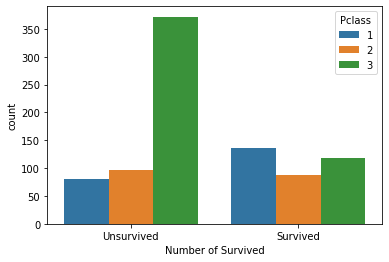

In [ ]:
plotSurvivedBy(data_mentah, "Pclass")

- **Embarked** : 

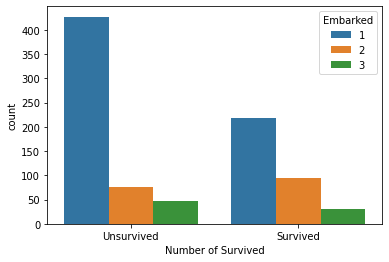

In [ ]:
plotSurvivedBy(data_mentah, "Embarked")

- Tidak mudah sulit untuk menganalisis feature lain seperti : Age, Fare,  PassengerId. setidaknya ada beberapa alasan:
  - Nilai dalam tipe integer/ float, perlu melakukan kategorisasi pada kelas penumpang kemudian mencari dugaan relasi dengan countplot. untuk kemudian dianalisis dengan analisis korelasi
  - Perlu adanya analisis lanjut karena memiliki keterkaitan dengan feature lain, misalnya antara Fare dengan Pclass. 
  - Id nampaknya tidak logis untuk mengelompokkan apakah penumpang selamat atau tidak. Namun bisa jadi penentuan ID ini berdasarkan kelas penumpang. Telah dinalisis pada poin sebelumnya kelas penumpang I lebih cenderung selamat dari insiden.  


**Hasil Regresi**
- Dengan langkah-langkah yang telah ditempuh (mulai dari membersihkan data dengan, pemilihan feature dan training dengan logistic regression) diperoleh hasil yang baik dengan nilai akurasi ~ 0.82. 
- Dengan nilai yang diperoleh, teknik yang telah dilakukan ini bisa diandalkan untuk memprediksi selamat atau tidaknya penumpang.
- Perlu dikaji lebih lanjut tentang korelasi masing-masing feature dengan keselamatan penumpang.